### 1. Configuración Inicial

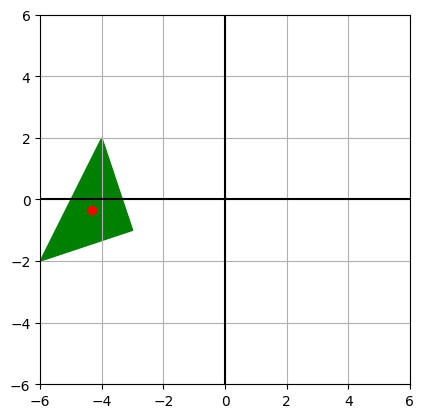

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# Coordenadas del triangulo
p1 = np.array([-6, -2])
p2 = np.array([-4, 2])
p3 = np.array([-3, -1])
vertices = np.array([p1, p2, p3]).T

# Centro del triángulo
def centroide(pts):
    return np.mean(pts, axis=1, keepdims=True)

# Configurar el plano cartesiano
fig, ax = plt.subplots()
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_aspect('equal', adjustable='box')
ax.grid(True)
ax.axhline(0, color='black')
ax.axvline(0, color='black')

# Dibujar triangulo en posición inicial
triangle, = ax.fill(vertices[0], vertices[1], color='g')

# Dibujar punto rojo en el centro del triángulo
c = centroide(vertices)
punto_centroide, = ax.plot(c[0], c[1], 'ro')

plt.show()

### 3. Correr la animación
Se busca lograr que en cada frame el triángulo:
* se traslade 0.2 unidades hacia la derecha respecto al eje x,
* rote sobre su propio eje 5°,
* aumente su tamaño en un 1.7%.

In [ ]:
# Parámetros de la animación
dx = 0.2
teta = np.radians(5)  # convertir a radianes
escala = 1.017  # aumentar tamaño en un 1.7%
frames = 50  # número de frames

# Guardar frames para el GIF
imagenes = []

def transformar(verts, dx, teta, escala):
    c = centroide(verts)
    verts_c = verts - c

    rotacion = np.array([
        [np.cos(teta), -np.sin(teta)],
        [np.sin(teta),  np.cos(teta)]
    ])

    escalado = np.array([
        [escala, 0],
        [0, escala]
    ])

    transformado = escalado @ (rotacion @ verts_c) + c + np.array([[dx], [0]])
    return transformado

def update(frame):
    global vertices
    vertices = transformar(vertices, dx, teta, escala)
    triangle.set_xy(vertices.T)

    # Actualizar punto rojo al nuevo centro
    c = centroide(vertices)
    punto_centroide.set_data(c[0], c[1])

ani = FuncAnimation(fig, update, frames=frames, interval=100)

# Guardar animación como GIF
ani.save("triangulo_animado.gif", writer='pillow')


### 3. Mostrar el GIF de la animación

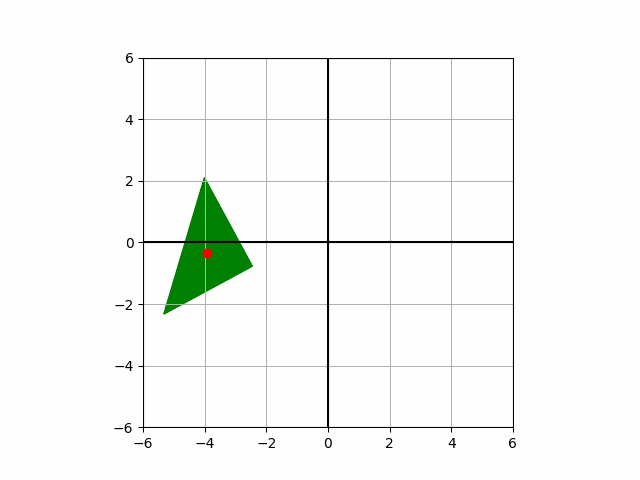

In [29]:
# Mostrar GIF
from IPython.display import Image
Image("triangulo_animado.gif")
